In [65]:
using LinearAlgebra
using Statistics
using Random
using Distributions
using DataFrames

### Projekt 1 - przedsiębiorstwo

In [2]:
# Współczynniki
alpha_11 = 0.85
alpha_12 = 0.1
alpha_21 = 0.5
alpha_22 = 0.5
alpha_23 = 0.0
alpha_31 = 0.12
alpha_32 = 0.12
M_przez_S = 0.3
S_przez_M = 1 / M_przez_S
alpha_13 = (1 - (alpha_11 + alpha_21*alpha_12/(1 - alpha_22)))*S_przez_M
alpha_33 = (1 - (alpha_31 + alpha_32*alpha_21/(1 - alpha_22))*S_przez_M);

In [3]:
# Macierz układu
A = [alpha_11 alpha_12 alpha_13; alpha_21 alpha_22 alpha_23; alpha_31 alpha_32 alpha_33]

3×3 Matrix{Float64}:
 0.85  0.1   0.166667
 0.5   0.5   0.0
 0.12  0.12  0.2

In [4]:
#Warunki początkowe
S = 5.0e6
D = 5.0e6
M = M_przez_S * D
X_0 = [D, S, M]
T = 100
# Sprawdzamy poprawność
#println("Okołopoprawne? ", A*X_0 ≈ X_0)
println("Poprawne? ", A*X_0 == X_0)

Poprawne? true


In [5]:
A

3×3 Matrix{Float64}:
 0.85  0.1   0.166667
 0.5   0.5   0.0
 0.12  0.12  0.2

In [6]:
M

1.5e6

In [7]:
X_0

3-element Vector{Float64}:
 5.0e6
 5.0e6
 1.5e6

In [8]:
A*X_0

3-element Vector{Float64}:
 5.0e6
 5.0e6
 1.5e6

In [118]:
# Tablice zmiennych
Z_D = 5000
X_D_zakł = zeros(Z_D, 3, T)
D_zakł = zeros(Z_D, T);
S_zakł = zeros(Z_D, T)
M_zakł = zeros(Z_D, T)

5000×100 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

In [103]:
# Rozkład Gumbela dla zakłóceń
#==#
μ = 0.0
λ = 2.5*10^(3)
Gumbel_distr_1 = Gumbel(μ,λ)
D_zakł[:, 2:T] .= rand(Gumbel_distr_1, Z_D, T-1)
S_zakł[:, 2:T] .= rand(Gumbel_distr_1, Z_D, T-1)
M_zakł[:, 2:T] .= rand(Gumbel_distr_1, Z_D, T-1)

5000×99 view(::Matrix{Float64}, :, 2:100) with eltype Float64:
  3719.72      402.028   -1068.02    …  -3107.28    -1428.87   -2405.2
   910.021   -1019.73    -3304.98        1155.9      1452.95   -2757.95
  3196.13     -188.25    -1757.45        6003.92     6330.74    1531.02
  2103.34    -1762.65     -360.134       5559.78     8378.87    2606.42
  4015.64     1673.94    -3772.44        5790.27     1005.7     3157.49
  -475.509    5592.39    -2036.9     …   7915.27     -147.903   1920.28
  3512.77     3003.39     -242.375       6089.66      -35.537   8289.25
   -48.0686   2030.02      780.128       -483.824    1540.28    1738.6
  1835.76     1774.23    -1045.51        -867.064    -158.358    -57.3702
  7512.76       86.7816   -291.242      -2584.43     3536.75   -1959.3
  2806.5     -2779.33     3080.07    …   -142.12     6412.05    -565.821
 10766.2      5031.77     2728.53        1966.12     -800.033    -46.5725
 -1308.79     2140.21    -1854.34         -18.2882   1630.12    3348.46

In [14]:
using JLD2
# @save "D_zakł.jld2" D_zakł
# @save "S_zakł.jld2" S_zakł
# @save "M_zakł.jld2" M_zakł

In [15]:
D_zakł_wczytane = load("D_zakł.jld2")
S_zakł_wczytane = load("S_zakł.jld2")
M_zakł_wczytane = load("M_zakł.jld2")

Dict{String, Any} with 1 entry:
  "M_zakł" => [0.0 16336.5 … 2710.01 4570.8; 0.0 -2185.15 … -973.645 -3671.55; …

In [16]:
typeof(D_zakł_wczytane)

Dict{String, Any}

In [17]:
typeof(D_zakł_wczytane["D_zakł"])

Matrix{Float64} (alias for Array{Float64, 2})

In [18]:
D_zakł = D_zakł_wczytane["D_zakł"]
S_zakł = S_zakł_wczytane["S_zakł"]
M_zakł = M_zakł_wczytane["M_zakł"]

5000×100 Matrix{Float64}:
 0.0  16336.5    -3744.09       540.743  …   5934.84    2710.01     4570.8
 0.0  -2185.15   -2574.37      2228.06       6138.93    -973.645   -3671.55
 0.0  -2317.98     772.495     -792.779     -1425.33    1902.56     1887.35
 0.0    598.186   1575.93      1586.47       1789.56   -2159.0     -1358.22
 0.0   -662.077   3074.37     -1863.9        1137.03    1110.46    -1667.02
 0.0   -284.096    458.304     1896.62   …    450.341   6421.12      795.579
 0.0   -299.095      3.63179  -1114.46       4489.94    2766.95     -288.582
 0.0   7299.9     -933.144    -1245.32      -1112.05     -13.9815     25.3016
 0.0   1692.67     361.846     5970.59       3793.77    -497.858    4133.59
 0.0   -632.465  -1842.36     -2000.7        4763.46    -106.115     828.02
 0.0   4001.09   -1446.13      2776.3    …  -1264.56     818.32    -1238.43
 0.0    674.129  -1633.92      4964.86       1669.12   -2432.61    -1457.44
 0.0  -4801.78     745.025     5302.98       1882.42    461

In [104]:
Wektory_D_zakł = zeros(Z_D, 3, T)
Wektory_D_zakł[:, 1, :] .= D_zakł
Wektory_D_zakł[:, 2, :] .= S_zakł
Wektory_D_zakł[:, 3, :] .= M_zakł

5000×100 view(::Array{Float64, 3}, :, 3, :) with eltype Float64:
 0.0   3719.72      402.028   …  -3107.28    -1428.87   -2405.2
 0.0    910.021   -1019.73        1155.9      1452.95   -2757.95
 0.0   3196.13     -188.25        6003.92     6330.74    1531.02
 0.0   2103.34    -1762.65        5559.78     8378.87    2606.42
 0.0   4015.64     1673.94        5790.27     1005.7     3157.49
 0.0   -475.509    5592.39    …   7915.27     -147.903   1920.28
 0.0   3512.77     3003.39        6089.66      -35.537   8289.25
 0.0    -48.0686   2030.02        -483.824    1540.28    1738.6
 0.0   1835.76     1774.23        -867.064    -158.358    -57.3702
 0.0   7512.76       86.7816     -2584.43     3536.75   -1959.3
 0.0   2806.5     -2779.33    …   -142.12     6412.05    -565.821
 0.0  10766.2      5031.77        1966.12     -800.033    -46.5725
 0.0  -1308.79     2140.21         -18.2882   1630.12    3348.46
 ⋮                            ⋱                         
 0.0    476.192    -319.258    

In [105]:
size(Wektory_D_zakł)

(5000, 3, 100)

In [119]:
#Powtórzenia układu - symulacja
size(X_D_zakł[:, :, 1])
size(X_0)
for i in range(1,Z_D)
    X_D_zakł[i, :, 1] .= X_0
end

### Przykładowo symulacja

In [26]:
# print(size(X_D_zakł))

X_D_zakł[1, :, :]

(5000, 3, 100)

3×100 Matrix{Float64}:
 5.0e6  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 5.0e6  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.5e6  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

### 1 Wpływ losowych zaklóceń popytu na układ i jego ewolucji w trakcie 100 okresów, ...:

* zakładamy że zakłócenia dotyczą wszystkich zmiennych (jednocześnie podaż, popyt i wydatki na działania sprzedażowe)

In [120]:
#W każdym okresie dajemy zmienną losową do WSZYSTKICH RÓWNAŃ:
size(X_D_zakł[:, :, 1])
size(X_0)
X_D_zakł[:, :, 1] .= transpose(X_0);
for z in 1:Z_D
    for t in 2:T
        X_D_zakł[z, :, t] = A * X_D_zakł[z, :, t-1] + 1000*Wektory_D_zakł[z, :, t]
    end
end

### Stary kod wykresy

In [147]:
# # Confidence intervals and statistics
# # CI_D_stats = zeros(T, 3, 5)
# CI_D_5p_min_D_zakł = zeros(T)
# CI_D_5p_max_D_zakł = zeros(T)
# CI_S_5p_min_D_zakł = zeros(T)
# CI_S_5p_max_D_zakł = zeros(T)
# CI_M_5p_min_D_zakł = zeros(T)
# CI_M_5p_max_D_zakł = zeros(T)
# CI_DS_5p_min_D_zakł = zeros(T)
# CI_DS_5p_max_D_zakł = zeros(T)
# UPORZADKOWANE_D = zeros(Z_D, T)
# UPORZADKOWANE_S = zeros(Z_D, T)
# UPORZADKOWANE_M = zeros(Z_D, T)
# UPORZADKOWANE_DS = zeros(Z_D, T)
# for t in 1:T
#     UPORZADKOWANE_D[:, t] = sort(X_D_zakł[:, 1, t])
#     CI_D_5p_min_D_zakł[t] = UPORZADKOWANE_D[250, t]
#     CI_D_5p_max_D_zakł[t] = UPORZADKOWANE_D[4750, t]
#     UPORZADKOWANE_S[:, t] = sort(X_D_zakł[:, 2, t])
#     CI_S_5p_min_D_zakł[t] = UPORZADKOWANE_S[250, t]
#     CI_S_5p_max_D_zakł[t] = UPORZADKOWANE_S[4750, t]
#     UPORZADKOWANE_M[:, t] = sort(X_D_zakł[:, 3, t])
#     CI_M_5p_min_D_zakł[t] = UPORZADKOWANE_M[250, t]
#     CI_M_5p_max_D_zakł[t] = UPORZADKOWANE_M[4750, t]
#     UPORZADKOWANE_DS[:, t] = sort(X_D_zakł[:, 1, t] - X_D_zakł[:, 2, t])
#     CI_DS_5p_min_D_zakł[t] = UPORZADKOWANE_DS[250, t]
#     CI_DS_5p_max_D_zakł[t] = UPORZADKOWANE_DS[4750, t]
# end
# CI_D_średnia_D_zakł = zeros(T)
# CI_S_średnia_D_zakł = zeros(T)
# CI_M_średnia_D_zakł = zeros(T)
# CI_DS_średnia_D_zakł = zeros(T)
# CI_D_mediana_D_zakł = zeros(T)
# CI_S_mediana_D_zakł = zeros(T)
# CI_M_mediana_D_zakł = zeros(T)
# CI_DS_mediana_D_zakł = zeros(T)

# CI_D_średnia_D_zakł[:] = mean(X_D_zakł[:, 1, :], dims=1)
# CI_S_średnia_D_zakł[:] = mean(X_D_zakł[:, 2, :], dims=1)
# CI_M_średnia_D_zakł[:] = mean(X_D_zakł[:, 3, :], dims=1)
# CI_DS_średnia_D_zakł[:] = mean(X_D_zakł[:, 1, :] - X_D_zakł[:, 2, :], dims=1)
# CI_D_mediana_D_zakł[:] = median(X_D_zakł[:, 1, :], dims=1)
# CI_S_mediana_D_zakł[:] = median(X_D_zakł[:, 2, :], dims=1)
# CI_M_mediana_D_zakł[:] = median(X_D_zakł[:, 3, :], dims=1)
# CI_DS_mediana_D_zakł[:] = median(X_D_zakł[:, 1, :] - X_D_zakł[:, 2, :], dims=1)

In [33]:
using Plots

In [145]:
# # Rysowanie - rysunek z trzema (pod)wykresami
# p = plot(layout = (3, 1), size = (600, 900)) # Trzy (pod)wykresy pionowo
# T=100
# # Subplot 1
# plot!(p[1], 1:T, CI_D_5p_min_D_zakł, color=:black, linestyle=:dash, label="CI_D_5p_min_D_zakł")
# plot!(p[1], 1:T, CI_D_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_D_5p_max_D_zakł")
# plot!(p[1], 1:T, CI_D_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_D_średnia_D_zakł")
# plot!(p[1], 1:T, CI_D_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_D_mediana_D_zakł")
# # Subplot 2
# plot!(p[2], 1:T, CI_S_5p_min_D_zakł, color=:black, linestyle=:dash, label="CI_S_5p_min_D_zakł")
# plot!(p[2], 1:T, CI_S_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_S_5p_max_D_zakł")
# plot!(p[2], 1:T, CI_S_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_S_średnia_D_zakł")
# plot!(p[2], 1:T, CI_S_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_S_mediana_D_zakł")
# # Subplot 3
# plot!(p[3], 1:T, CI_M_5p_min_D_zakł, color=:black, linestyle=:dash, label="CI_M_5p_min_D_zakł")
# plot!(p[3], 1:T, CI_M_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_M_5p_max_D_zakł")
# plot!(p[3], 1:T, CI_M_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_M_średnia_D_zakł")
# plot!(p[3], 1:T, CI_M_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_M_mediana_D_zakł")
# # Display the plot
# display(p)
# #
# savefig(p, "plot2.svg")
# #UWAGA, BRZYDKO WYCHODZI - TRZEBA BĘDZIE DOSTOSOWAĆ WYKRES!


In [144]:
# Rysowanie - rysunek z trzema (pod)wykresami
# p = plot(layout = (3, 1), size = (500, 750),left_margin = 6Plots.mm) # POSZERZAMY L
# T=100
# # Subplot 1
# plot!(p[1], 1:T, CI_D_5p_min_D_zakł, color=:black, linestyle=:dash, label="CI_D_5p_min_D_zakł")
# plot!(p[1], 1:T, CI_D_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_D_5p_max_D_zakł")
# plot!(p[1], 1:T, CI_D_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_D_średnia_D_zakł")
# plot!(p[1], 1:T, CI_D_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_D_mediana_D_zakł")
# # Subplot 2
# plot!(p[2], 1:T, CI_S_5p_min_D_zakł, color=:black, linestyle=:dash, label="CI_S_5p_min_D_zakł")
# plot!(p[2], 1:T, CI_S_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_S_5p_max_D_zakł")
# plot!(p[2], 1:T, CI_S_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_S_średnia_D_zakł")
# plot!(p[2], 1:T, CI_S_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_S_mediana_D_zakł")
# # Subplot 3
# plot!(p[3], 1:T, CI_M_5p_min_D_zakł, color=:black, linestyle=:dash, label="CI_M_5p_min_D_zakł")
# plot!(p[3], 1:T, CI_M_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_M_5p_max_D_zakł")
# plot!(p[3], 1:T, CI_M_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_M_średnia_D_zakł")
# plot!(p[3], 1:T, CI_M_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_M_mediana_D_zakł")
# # Display the plot
# display(p)
# #
# #savefig(p, "plot_rzd2.svg")

#### Badanie luki popytowej:

In [143]:
# # Badanie równowagi rynkowej - czy istnieje luka popytowa?
# p = plot(layout = (1, 1), size = (600, 300)) # Trzy (pod)wykresy pionowo
# T=100
# # Subplot 1
# plot!(p[1], 1:T, CI_DS_5p_min_D_zakł , color=:black, linestyle=:dash, label="CI_D-S_5p_min_D_zakł")
# plot!(p[1], 1:T, CI_DS_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_D-S_5p_max_D_zakł")
# plot!(p[1], 1:T, CI_DS_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_D-S_średnia_D_zakł")
# plot!(p[1], 1:T, CI_DS_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_D-S_mediana_D_zakł")

# # Display the plot
# display(p)
# #

### Nowy kod skrócony

In [121]:
dict_D_zakł = Dict("D" => 1, "S" => 2, "M"=> 3, "DS" => 4)
# statystyki  = Dict("średnia" => zeros(T), "mediana" => zeros(T), "5p_min" = zeros(T), "5_max" = zeros(T))
# DataFrame(dict_D_zakł)
X_D_zakł_2 = zeros(Z_D, 4, T)
X_D_zakł_2[:,1:3,:] = X_D_zakł[:,1:3,:]
X_D_zakł_2[:,4,:] = X_D_zakł[:,1,:] - X_D_zakł[:,2,:] 
dict_D_stats =  Dict("D" => DataFrame(), "S" => DataFrame(), "M"=> DataFrame(), "DS" => DataFrame())
for (key, value) in dict_D_zakł
    dict_statystyki  = Dict("średnia" => zeros(T), "mediana" => zeros(T), "min_5p" => zeros(T), "max_5p" => zeros(T))
    UPORZĄDKOWANE = zeros(Z_D, T)
    for t in 1:T
        UPORZĄDKOWANE[:, t] = sort(X_D_zakł_2[:, value, t])
        dict_statystyki["min_5p"][t] = UPORZĄDKOWANE[250, t]
        dict_statystyki["max_5p"][t] = UPORZĄDKOWANE[4750, t]
    end
    dict_statystyki["średnia"][:] = mean(X_D_zakł_2[:, value, :], dims=1)
    dict_statystyki["mediana"][:] = median(X_D_zakł_2[:, value, :], dims=1)
    df = DataFrame(dict_statystyki)
    dict_D_stats[key] = df
end 


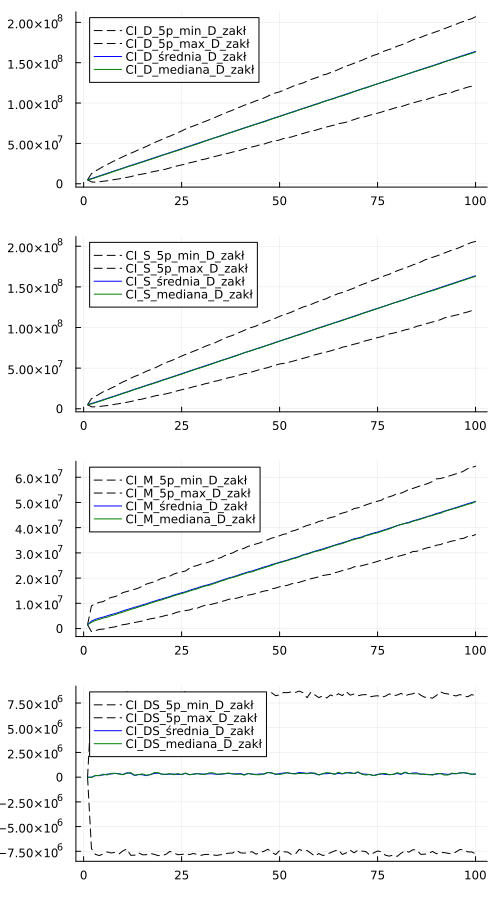

In [142]:
# Rysowanie - rysunek z trzema (pod)wykresami
p = plot(layout = (4, 1), size = (500, 900),left_margin = 6Plots.mm) # POSZERZAMY L
T=100
# Subplot 1
for (key, value) in dict_D_stats
    plot!(p[dict_D_zakł[key]], 1:T, value[:,"min_5p"], color=:black, linestyle=:dash, label="CI_"*key*"_5p_min_D_zakł")
    plot!(p[dict_D_zakł[key]], 1:T, value[:,"max_5p"], color=:black, linestyle=:dash, label="CI_"*key*"_5p_max_D_zakł")
    plot!(p[dict_D_zakł[key]], 1:T, value[:,"średnia"], color=:blue, linestyle=:solid, label="CI_"*key*"_średnia_D_zakł")
    plot!(p[dict_D_zakł[key]], 1:T, value[:,"mediana"], color=:green, linestyle=:solid, label="CI_"*key*"_mediana_D_zakł")
end 

display(p)


### 2) Wpływ losowych zakłóceń popytu na układ i jego ewolucji w trakcie 100 okresów, przy założeniu, że jedynym okresem z zakłóceniami jest t = 1

In [148]:
#Powtórzenia układu - symulacja
size(X_D_zakł[:, :, 1])
size(X_0)
X_D_zakł[:, :, 1] .= transpose(X_0);
for z in 1:Z_D
    for t in 2:T
        if t==2
            X_D_zakł[z, :, t] = A * X_D_zakł[z, :, t-1] + 1000*Wektory_D_zakł[z, :, t]
        else
            X_D_zakł[z, :, t] = A * X_D_zakł[z, :, t-1] 
        end

    end
end

In [149]:
dict_D_zakł = Dict("D" => 1, "S" => 2, "M"=> 3, "DS" => 4)
# statystyki  = Dict("średnia" => zeros(T), "mediana" => zeros(T), "5p_min" = zeros(T), "5_max" = zeros(T))
# DataFrame(dict_D_zakł)
X_D_zakł_2 = zeros(Z_D, 4, T)
X_D_zakł_2[:,1:3,:] = X_D_zakł[:,1:3,:]
X_D_zakł_2[:,4,:] = X_D_zakł[:,1,:] - X_D_zakł[:,2,:] 
dict_D_stats =  Dict("D" => DataFrame(), "S" => DataFrame(), "M"=> DataFrame(), "DS" => DataFrame())
for (key, value) in dict_D_zakł
    dict_statystyki  = Dict("średnia" => zeros(T), "mediana" => zeros(T), "min_5p" => zeros(T), "max_5p" => zeros(T))
    UPORZĄDKOWANE = zeros(Z_D, T)
    for t in 1:T
        UPORZĄDKOWANE[:, t] = sort(X_D_zakł_2[:, value, t])
        dict_statystyki["min_5p"][t] = UPORZĄDKOWANE[250, t]
        dict_statystyki["max_5p"][t] = UPORZĄDKOWANE[4750, t]
    end
    dict_statystyki["średnia"][:] = mean(X_D_zakł_2[:, value, :], dims=1)
    dict_statystyki["mediana"][:] = median(X_D_zakł_2[:, value, :], dims=1)
    df = DataFrame(dict_statystyki)
    dict_D_stats[key] = df
end 


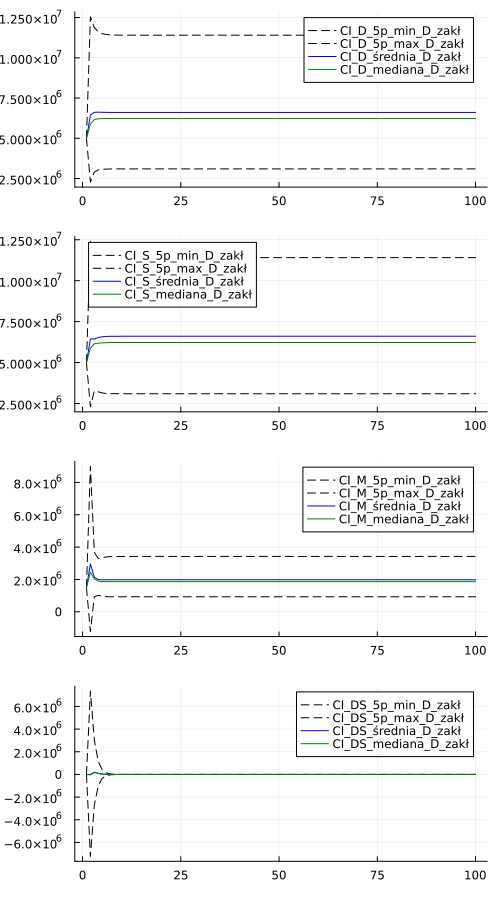

In [150]:
# Rysowanie - rysunek z trzema (pod)wykresami
p = plot(layout = (4, 1), size = (500, 900),left_margin = 6Plots.mm) # POSZERZAMY L
T=100
# Subplot 1
for (key, value) in dict_D_stats
    plot!(p[dict_D_zakł[key]], 1:T, value[:,"min_5p"], color=:black, linestyle=:dash, label="CI_"*key*"_5p_min_D_zakł")
    plot!(p[dict_D_zakł[key]], 1:T, value[:,"max_5p"], color=:black, linestyle=:dash, label="CI_"*key*"_5p_max_D_zakł")
    plot!(p[dict_D_zakł[key]], 1:T, value[:,"średnia"], color=:blue, linestyle=:solid, label="CI_"*key*"_średnia_D_zakł")
    plot!(p[dict_D_zakł[key]], 1:T, value[:,"mediana"], color=:green, linestyle=:solid, label="CI_"*key*"_mediana_D_zakł")
end 

display(p)
